### Classificando problemas ortopédicos

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas **anonimizadas**, sendo **100** de pacientes considerados sem problemas **(Normal - NO)**, **60** de pacientes com **Hérnia de Disco (Disk Hernia - DH)** e **150** de pacientes com Espondilolistese **(Spondylolisthesis - SL)**. 

O dataset está disponível em https://www.openml.org/d/1523


# Passo 1: Carregar a base de dados

In [1]:
from sklearn.datasets import fetch_openml #importando o open ML
import pandas as pd                       
import matplotlib.pyplot as plt           
import seaborn as sns                    
import numpy as np                        

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, cohen_kappa_score                      
from sklearn.preprocessing import StandardScaler, MinMaxScaler                             

In [2]:
dados = fetch_openml(data_id=1523)

In [3]:
tabela_dados = pd.DataFrame(data=dados['data'])

In [4]:
tabela_dados.head()

,V1,V2,V3,V4,V5,V6
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


### Transformando a base de dados:

In [5]:
classes = {'1':'Disk Hernia',
           '2':'Normal',
           '3':'Spondylolisthesis'}

In [6]:
classes['1'], classes['2'], classes['3']

('Disk Hernia', 'Normal', 'Spondylolisthesis')

In [7]:
tabela_dados['diagnostic'] = [classes[target] for target in dados.target]

In [9]:
tabela_dados.head()

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


## Passo 2: Análise exploratória dos dados

In [8]:
tabela_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          310 non-null    float64
 1   V2          310 non-null    float64
 2   V3          310 non-null    float64
 3   V4          310 non-null    float64
 4   V5          310 non-null    float64
 5   V6          310 non-null    float64
 6   diagnostic  310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [10]:
len(tabela_dados)

310

In [11]:
tabela_dados.describe()

,V1,V2,V3,V4,V5,V6
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742386,121.429566,163.071041,418.543082


Como está a média dos dados?

In [12]:
tabela_dados.groupby('diagnostic').mean()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [13]:
tabela_dados.groupby('diagnostic').describe()

V1                                              \
                   count       mean        std        min        25%   
diagnostic                                                             
Disk Hernia         60.0  47.638407  10.697131  26.147921  41.018099   
Normal             100.0  51.685244  12.368161  30.741938  42.817849   
Spondylolisthesis  150.0  71.514224  15.109337  37.903910  60.658136   

                                                        V2             ...  \
                         50%        75%         max  count       mean  ...   
diagnostic                                                             ...   
Disk Hernia        46.416169  53.922329   74.433593   60.0  17.398795  ...   
Normal             50.123115  61.470097   89.834676  100.0  12.821414  ...   
Spondylolisthesis  72.149306  81.075893  129.834041  150.0  20.748038  ...   

                           V5                 V6                        \
                          75%         max  count       mean        std   
diagnostic                                                               
Disk Hernia        122.042999  137.540613   60.0   2.480251   5.531177   
Normal             129.040402  147.894637  100.0   2.186572   6.307483   
Spondylolisthesis  123.337307  163.071041  150.0  51.896687  40.108030   

                                                                           
                         min        25%        50%        75%         max  
diagnostic                                                                 
Disk Hernia       -10.675871  -0.910818   2.542441   6.059666   15.779697  
Normal            -11.058179  -1.511360   1.152710   4.968807   31.172767  
Spondylolisthesis   1.010041  30.393271  42.372509  61.894425  418.543082  

[3 rows x 48 columns]

Analisando o outlier:

In [14]:
tabela_dados.loc[tabela_dados['V6'] > 400]

,V1,V2,V3,V4,V5,V6,diagnostic
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis


# Removendo o outlier:

In [15]:
tabela_dados.drop(tabela_dados.loc[tabela_dados['V6'] > 400].index, inplace=True)

In [16]:
tabela_dados.loc[tabela_dados['V6'] > 400]

,V1,V2,V3,V4,V5,V6,diagnostic


## Passo 3: Separação dos dados

In [17]:
x = tabela_dados.drop(columns=['diagnostic'])
y = tabela_dados['diagnostic'] #O que eu quero prever. (Target)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42) 

### Passo 4: Normalizando os dados

In [19]:
#scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)
scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(x_train)# qual média e std será utilizado para o escalonamento

x_train_scaled = scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

### Passo 5: Criação do modelo

### Treinando o modelo com dados sem escalonamento:

In [20]:
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

modelo_classificador.fit(x_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=3)

### Validação do modelo (testando o modelo)

In [21]:
# Predição sem escalolnamento
y_predito = modelo_classificador.predict(x_test_scaled)

In [22]:
tabela_dados.groupby('diagnostic').count()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,149,149,149,149,149,149


In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 1500x500 with 0 Axes>

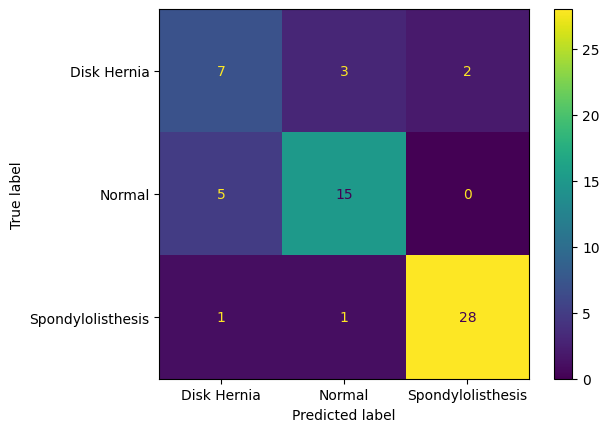

In [24]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predito,
                                   labels=['Disk Hernia', 'Normal', 'Spondylolisthesis'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                              display_labels=['Disk Hernia', 'Normal', 'Spondylolisthesis'])
disp.plot(values_format='d') 

In [25]:
print(classification_report(y_test, y_predito))

                   precision    recall  f1-score   support

      Disk Hernia       0.54      0.58      0.56        12
           Normal       0.79      0.75      0.77        20
Spondylolisthesis       0.93      0.93      0.93        30

         accuracy                           0.81        62
        macro avg       0.75      0.76      0.75        62
     weighted avg       0.81      0.81      0.81        62



### Testando o KNN com validação cruzada:

### Incluindo a etapa de validação do modelo de knn:

Estamos fazendo a VALIDAÇÃO dos melhores hiperparâmetros do modelo de ML:

Idealmente, devemos ter 5 conjuntos de dados (treino, teste, validacao) ou usar a validação cruzada em cima dos dados de treino.

In [26]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 

In [27]:
kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) os dados.
result = cross_val_score(modelo_classificador, x, y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.77419355 0.82258065 0.79032258 0.77419355 0.81967213]
Mean R^2 for Cross-Validation K-Fold: 0.7961924907456372


A saída exibirá a precisão média do modelo (ou seja, a acurácia) com uma medida de variação associada (calculada pela multiplicação do desvio padrão por 2). 

Escolhendo os melhores hiperparâmetros com validação cruzada:

In [28]:
from sklearn.model_selection import GridSearchCV #metodo para seleção dos melhores Ks (#Basicamente a busca por força bruta)
from sklearn.metrics import make_scorer, accuracy_score, f1_score #métricas de validação
import numpy as np
import matplotlib.pyplot as plt

In [29]:
error = [] #armazenar os erros

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

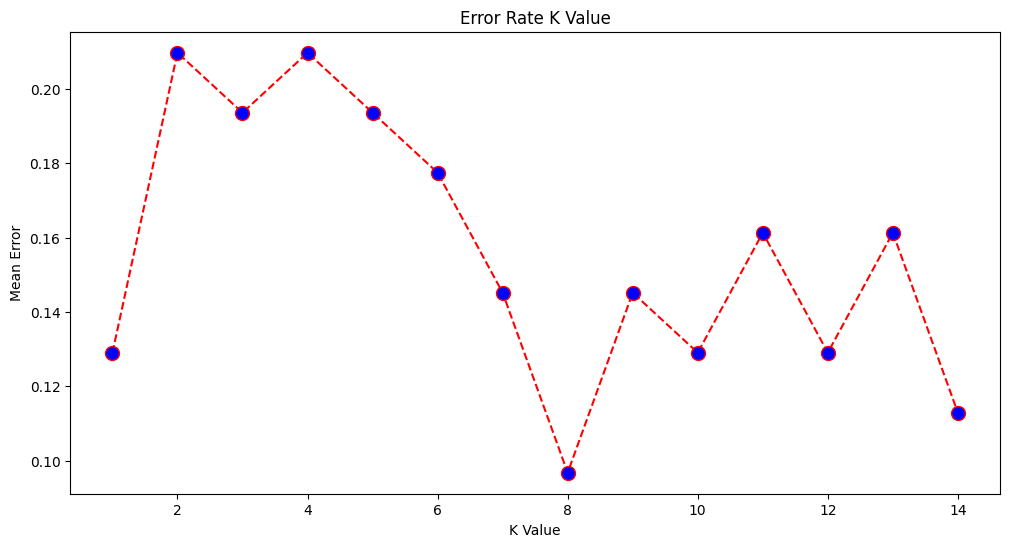

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [31]:
# Buscar os melhores parâmetros
# Vamos usar uma técnica chamada Gridsearch que é basicamente a busca por força bruta
# Iremos utilizar a técnica de validação cruzada de 5 folds (divisões) em cima do conjunto de treinamento
# Como métrica de melhor desemepnho usaremos a acurácia, isto é, estamos buscando os hiperparâmetros que maximizam a acurácia

# Parâmetros testados
param_grid = {'n_neighbors':[8,14], #total de vizinhos
              'weights': ['uniform', 'distance'], #Função de peso usada na previsão
              'metric':['cosine', 'euclidean', 'manhattan'] #métrica para cálculo da distância
             }

# Métrica de desempenho = melhor acurácia
gs_metric = make_scorer(accuracy_score, greater_is_better=True)

grid = GridSearchCV(KNeighborsClassifier(), 
                    param_grid=param_grid,
                    scoring=gs_metric,
                    cv=5, n_jobs=4, verbose=3) #cv = gerador de validação cruzada / n_jobs = determina a quantidade de jobs processados

grid.fit(x_train_scaled, y_train) #Selecionando os melhores hiperparametros com base nos dados de treino
knn_params = grid.best_params_
print('KNN', knn_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
KNN {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


In [32]:
grid.cv_results_ #analisando todos os possíveis testes

{'mean_fit_time': array([0.00329442, 0.00230618, 0.00166144, 0.00156755, 0.00194259,
        0.00171456, 0.00211143, 0.00165296, 0.00204172, 0.00149417,
        0.00123639, 0.00182009]),
 'std_fit_time': array([0.0010001 , 0.0007358 , 0.0004661 , 0.00063696, 0.00076269,
        0.0004076 , 0.00059913, 0.0005028 , 0.00101165, 0.00076352,
        0.00038772, 0.00076104]),
 'mean_score_time': array([0.00826778, 0.00583692, 0.00832591, 0.0033329 , 0.00739846,
        0.0028657 , 0.00708909, 0.00287418, 0.00557356, 0.00286317,
        0.00592785, 0.00216241]),
 'std_score_time': array([0.00219309, 0.00215942, 0.00096286, 0.00096007, 0.00102991,
        0.00035393, 0.00166645, 0.00142663, 0.00098389, 0.00043605,
        0.00122618, 0.00019005]),
 'param_metric': masked_array(data=['cosine', 'cosine', 'cosine', 'cosine', 'euclidean',
                    'euclidean', 'euclidean', 'euclidean', 'manhattan',
                    'manhattan', 'manhattan', 'manhattan'],
              mask=[False, Fa

### Testando vários tipos de algoritmos de classificação:

In [34]:
def AplicaValidacaoCruzada(x_axis, y_axis):
  # Linear Models.
  from sklearn.neighbors import KNeighborsClassifier  # k-vizinhos mais próximos (KNN)
  from sklearn.ensemble import RandomForestClassifier # RandomForest
  from sklearn.svm import SVC                         # Maquina de Vetor Suporte SVM

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # Configuração de KFold.
  kfold  = KFold(n_splits=10, shuffle=True) 

  # Axis
  x = x_axis
  y = y_axis

  # Criando os modelos

  # KNN
  knn = KNeighborsClassifier(n_neighbors=8, metric= 'euclidean', weights='distance') 
  knn.fit(x, y) 

  # SVM
  svm = SVC()
  svm.fit(x, y)

  # RandomForest
  rf = RandomForestClassifier(random_state=7) 
  rf.fit(x, y) 

  # Applyes KFold to models.
  knn_result = cross_val_score(knn, x, y, cv = kfold)
  svm_result = cross_val_score(svm, x, y, cv = kfold)
  rf_result = cross_val_score(rf, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "KNN": knn_result.mean(),
    "SVM": svm_result.mean(),
    "RF": rf_result.mean()
  }
  # Select the best model.
  melhorModelo = max(dic_models, key=dic_models.get)

  print("KNN (R^2): {0}\nSVM (R^2): {1}\nRandom Forest (R^2): {2}".format(knn_result.mean(), svm_result.mean(), rf_result.mean()))
  print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))



In [35]:
  AplicaValidacaoCruzada(x, y)

KNN (R^2): 0.8480645161290322
SVM (R^2): 0.8508602150537634
Random Forest (R^2): 0.8478494623655914
O melhor modelo é : SVM com o valor: 0.8508602150537634
